#데이터 불러오기 (Air passenger)

1. 데이터 불러오고 df를 통해서 데이터 확인하기.
2. 데이터 분석 이전에 원데이터를 차트에 표시하기.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error #RMSE를 체크하기 위함.
from fbprophet import Prophet

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.columns = ['ds', 'y']

In [2]:
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


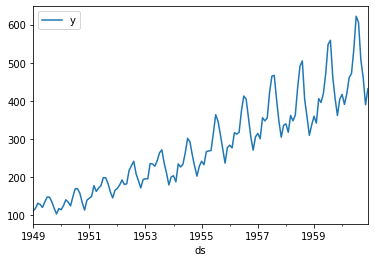

In [3]:
df_1 = df.set_index('ds')
df_1.index = pd.to_datetime(df_1.index)
df_1.plot()

In [4]:
from datetime import datetime
training_data=df[df.ds<datetime(1959, 1, 1)]
test_data=df[df.ds>=datetime(1959, 1, 1)]

In [5]:
training_data.tail(5)

,ds,y
115,1958-08-01,505
116,1958-09-01,404
117,1958-10-01,359
118,1958-11-01,310
119,1958-12-01,337


In [6]:
test_data.head(5)

,ds,y
120,1959-01-01,360
121,1959-02-01,342
122,1959-03-01,406
123,1959-04-01,396
124,1959-05-01,420


#Prophet(패이스북에서 제공하는 라이브러리)

- prophet의 장점은 트렌드, 계절성, 휴일에 대해서 분석하고 알맞는 예측을 진행하는 것이다.
- 이번 파트에서는 airpassenger 데이터를 학습하고 5년치 데이터를 예측하는 것이다.

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


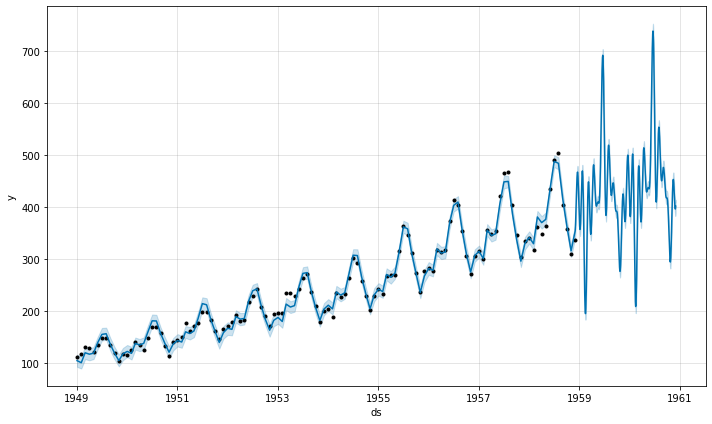

In [7]:
# 계절성을 Multi로 설정하고 기존 df로 훈련하는 부분
# 계절성을 Mul로 하는 이유는 시간에 대해서 데이터의 계절성 변동이 점차 증가하는 형태이기 때문임.
model = Prophet(seasonality_mode='multiplicative')
model.fit(training_data)

# 미래 예측 부분에서는 일단위로 5년치를 예측하도록 설정하였음.(default값이 일간 예측임.)
# 만약, 월간 데이터를 예측하고 싶다면, freq='M'으로 설정해야 한다.

future = model.make_future_dataframe(periods=365 * 2) 
forecast1 = model.predict(future)
fig = model.plot(forecast1)
plt.show()

# 해당 모형에서는 prophet이 주별, 일별 계절성을 찾이볼 수 없기에 (원데이터가 애초에 월별임)
# prophet에서는 주별, 월별 계절성을 과적합하여 예측을 진행하게 되었음.
# black dot은 실제 데이터를 의미하고, 파란선은 예측치(yhat), 조금 보이는 음영은 lower,upper yhat임.
# 모형을 보면, 월별 데이터를 가지고 일별 데이터를 예측했기 때문에 override된 것을 확인할 수 있음.
# 따라서, 이 모형의 적합성은 다소 부족하다고 볼 수 있을 것임.
# 또한, 데이터의 개수가 원 데이터보다 많기에 RMSE도 체크하기 어렵다.
# https://daewonyoon.tistory.com/267 를 참고하면, 더 자세한 정보를 알 수 있음.

In [8]:
forecast1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          850 non-null    datetime64[ns]
 1   trend                       850 non-null    float64       
 2   yhat_lower                  850 non-null    float64       
 3   yhat_upper                  850 non-null    float64       
 4   trend_lower                 850 non-null    float64       
 5   trend_upper                 850 non-null    float64       
 6   multiplicative_terms        850 non-null    float64       
 7   multiplicative_terms_lower  850 non-null    float64       
 8   multiplicative_terms_upper  850 non-null    float64       
 9   yearly                      850 non-null    float64       
 10  yearly_lower                850 non-null    float64       
 11  yearly_upper                850 non-null    float64       

In [9]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# yhat은 추정치라고 보면 됨. 따라서 upper,lower가 있는데 이것은 신뢰구간이라고 해석하면 됨

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,105.066686,93.116065,116.378153
1,1949-02-01,101.091117,89.847178,113.130830
2,1949-03-01,120.193799,107.998780,132.249401
3,1949-04-01,117.456052,105.660321,129.409157
4,1949-05-01,119.394492,108.062446,130.972275
...,...,...,...,...
845,1960-11-26,397.654060,385.562824,411.041068
846,1960-11-27,396.562858,383.228905,409.566514
847,1960-11-28,396.880407,384.063858,411.239851
848,1960-11-29,398.675574,385.855079,411.838823


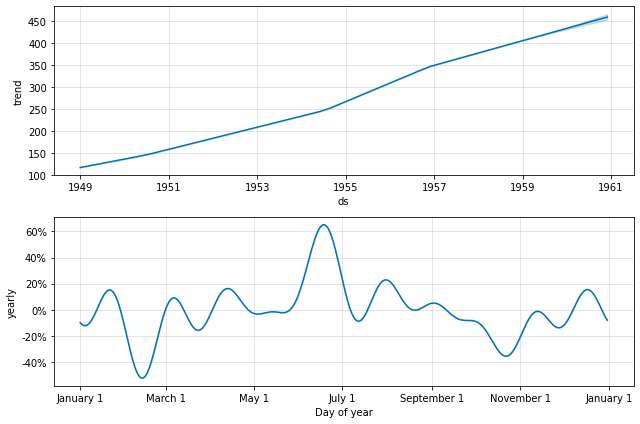

In [10]:
model.plot_components(forecast1)
plt.tight_layout()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


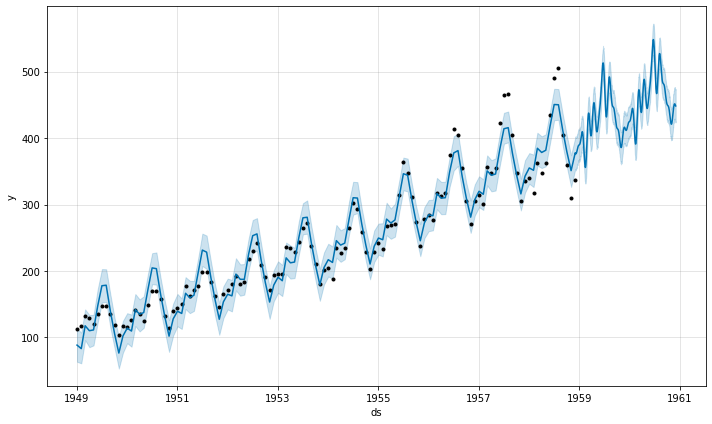

In [11]:
model = Prophet(seasonality_mode='additive')
model.fit(training_data)
future = model.make_future_dataframe(periods=365 * 2)
forecast2 = model.predict(future)
fig = model.plot(forecast2)
plt.show()

# 계절성을 add로 본 결과는 예측치와 실제 값이 이미 차이가 나는 것을 확인할 수 있음.
# 따라서, 계절성의 변동성이 점진적으로 증가하는 데이터 값에서는 add보다 mul을 사용하는 것이 더 좋다고 판단할 수 있음.
# 그러므로 add로 설정한 부분은 pass~

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


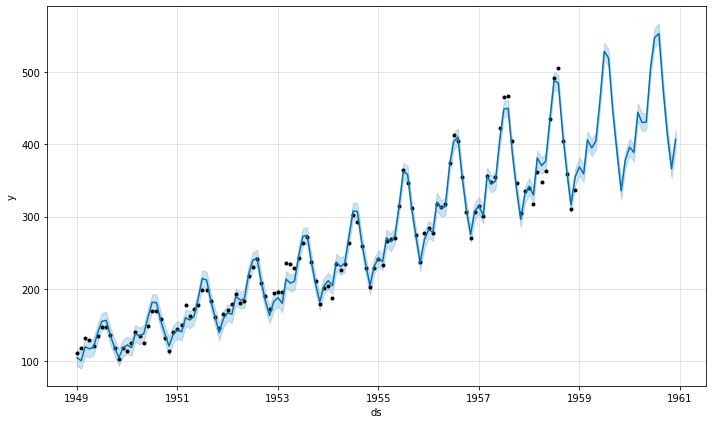

In [12]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(training_data)

# 번에는 원 데이터가 매월 1일자에 제공된 데이터이므로, frequency를 MS(Month Start)로 지정하고
# Period도 12개월 * 5년 이렇게 설정하였음.
future = model.make_future_dataframe(periods=12 * 2, freq='MS')
forecast3 = model.predict(future)
fig = model.plot(forecast3)
plt.show()

# 처음 분석했던 periods = 365 * 5 보다는 시각적으로도 더 깔끔하게 보임. (사실 월별로 정렬했기에 당연한 결과일 수도 있음.)

In [13]:
forecast3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          144 non-null    datetime64[ns]
 1   trend                       144 non-null    float64       
 2   yhat_lower                  144 non-null    float64       
 3   yhat_upper                  144 non-null    float64       
 4   trend_lower                 144 non-null    float64       
 5   trend_upper                 144 non-null    float64       
 6   multiplicative_terms        144 non-null    float64       
 7   multiplicative_terms_lower  144 non-null    float64       
 8   multiplicative_terms_upper  144 non-null    float64       
 9   yearly                      144 non-null    float64       
 10  yearly_lower                144 non-null    float64       
 11  yearly_upper                144 non-null    float64       

In [14]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,105.066686,93.518614,117.134193
1,1949-02-01,101.091117,90.186230,112.808901
2,1949-03-01,120.193799,107.170657,131.105305
3,1949-04-01,117.456052,105.609709,128.736811
4,1949-05-01,119.394492,108.342723,131.510456
...,...,...,...,...
139,1960-08-01,552.997498,539.797931,566.633530
140,1960-09-01,476.215420,463.050586,490.360191
141,1960-10-01,414.729171,401.559813,426.756291
142,1960-11-01,366.197413,352.857065,378.817409


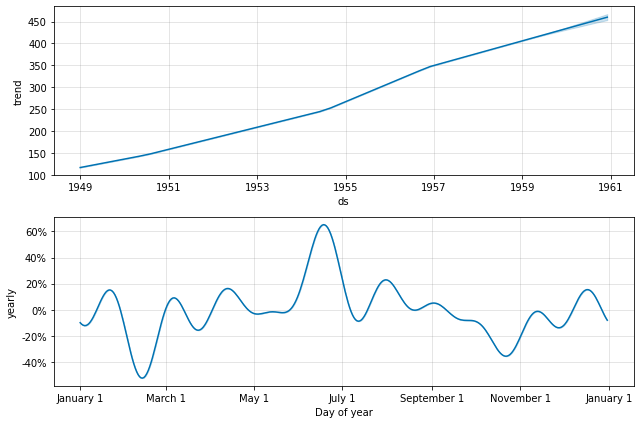

In [15]:
model.plot_components(forecast3)
plt.tight_layout()

In [16]:
def RMSE (Forecast):
  RMSE = pd.DataFrame( {'Observed': df.y, 'Predicted': Forecast})
  rmse = np.sqrt(mean_squared_error(RMSE.Observed, RMSE.Predicted))
  print("\nAccuracy measures ")
  print('RMSE: %.3f' %rmse)

#이것은 RMSE로 Root Mean Squared Error임. 관측치와 예측치의 값을 오차항이라고 하는데,
#여기서 오차항을 제곱하고 루트를 하여 절대값으로 표시한 error로 보면 됨. (낮으면 좋음)

In [17]:
RMSE(forecast3.yhat)

#오차가 매우 낮은 상태를 알 수 있음. (하지만 과적합을 생각할 여지도 있음.)


Accuracy measures 
RMSE: 14.911


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [19]:
def adf_test(x):
    
    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']
    adf_test = adfuller(x, autolag='AIC')
    # if 'AIC' (default) or 'BIC', then the number of lags is chosen to minimize the corresponding information criterion
    # AIC가 디폴트 값인데, lag의 수준을 최적화하는 것으로 보면 됨.
    # H0은 non-stationary
    # H1은 stationary
    results = pd.Series(adf_test[0:4], index=indices)
    for key, value in adf_test[4].items():
        results[f'Critical Value ({key})'] = value

    return results

In [20]:
def kpss_test(x, h0_type='c'):

    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type)

    # regrssion = c or ct로 설정할 수 있음. 
    # c=contant : 해당 데이터가 정상성이 있다. 귀무가설에 해당함. (H0 = stationary)
    # ct=data is stationary around a trend lags : 해당 데이터에 트랜드를 제거하는 것이 정상성을 만드는 방법
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value

    return results


In [21]:
adf_test(forecast3.yhat)

Test Statistic              0.667218
p-value                     0.989160
# of Lags Used             13.000000
# of Observations Used    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64

In [24]:
kpss_test(forecast3.yhat)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



Test Statistic            1.057532
p-value                   0.010000
# of Lags                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

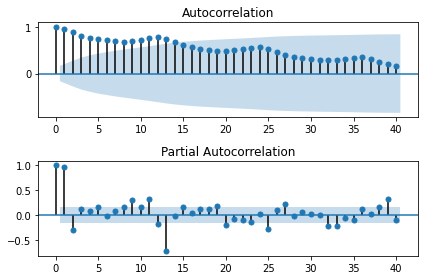

In [26]:
N_LAGS = 40
SIGNIFICANCE_LEVEL = 0.05

#Lag는 40으로, 유의수준은 5% 지정하였음. 만약 이를 바꾸고 싶으면 정의한 부분을 변경하면 됨.

fig, ax = plt.subplots(2, 1)
plot_acf(forecast3.yhat, ax=ax[0], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plot_pacf(forecast3.yhat, ax=ax[1], lags=N_LAGS, alpha=SIGNIFICANCE_LEVEL)
plt.tight_layout()

ADF, KPSS 검정과 자기상관성 검정으로 forecast.yhat에 대해서 검정을 진행한 결과 해당 데이터의 특성이 비정상성인 것을 확인할 수 있었음.

In [ ]:
selected_columns = ['price_log_diff', 'roll_mean_log_diff', 'roll_std_log_diff']
df['price_log_diff'] = df.price_log.diff(1)
df['roll_mean_log_diff'] = df.price_log_diff.rolling(WINDOW).mean()
df['roll_std_log_diff'] = df.price_log_diff.rolling(WINDOW).std()
df[selected_columns].plot(title='Gold Price (1st differences of log value)')

In [ ]:
#자연로그를 활용한 지수 평활화

WINDOW = 12
selected_columns = ['price_log', 'rolling_mean_log', 'rolling_std_log']

df['price_log'] = np.log(df.price_deflated)
df['rolling_mean_log'] = df.price_log.rolling(window=WINDOW).mean()   #이동평균선을 보여준다.
df['rolling_std_log'] = df.price_log.rolling(window=WINDOW).std()     #Std가 거의 일정하다로 보면됨.

df[selected_columns].plot(title='Gold Price (logged)')

In [ ]:
#CPI를 사용한 지수 평활화

DEFL_DATE = date(2011, 12, 31)

df['dt_index'] = df.index.map(lambda x: x.to_pydatetime().date())
df['price_deflated'] = df.apply(lambda x: cpi.inflate(x.price, x.dt_index, DEFL_DATE), axis=1)
df[['price', 'price_deflated']].plot(title='Gold Price (deflated)')

In [ ]:
forecast3.yhat = forecast3.yhat